In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_pickle('microstucture.pkl')
df.head()

,curve_n,curve_area,sizes,ratios,roundness
0,"[1, 3, 54]","[44.980112526027035, 47.16146038289884, 249.58...","{16: [[11.634028130284323, 5.182346340744194]]...","{16: [2.2449345075253415], 8: [1.6455719360013...","{16: [0.6858273932924801], 8: [0.7353582880135..."
1,"[4, 8, 0]","[278.0840614361895, 144.40479803053336, 0.0]","{16: [[10.922469597792166, 7.119867552525796],...","{16: [1.534083256073687, 1.3558929490918499, 1...","{16: [0.6918901640856667, 0.6835016016191318, ..."
2,"[2, 13, 0]","[125.1913778438531, 215.9813556447589, 0.0]","{16: [[11.30634428058544, 8.841091265113812], ...","{16: [1.2788403537015056, 1.1453809717470627],...","{16: [0.8122733416691932, 0.7154878314704103],..."
3,"[3, 9, 29]","[147.8599102513112, 162.24778265410401, 130.09...","{16: [[8.744291518313723, 3.9869423477763792],...","{16: [2.1932324963742302, 1.872639248932646, 1...","{16: [0.6374008046284033, 0.595356037624701, 0..."
4,"[4, 4, 34]","[214.29927185031744, 67.99614832644124, 148.78...","{16: [[8.53137439993541, 7.901661968749836], [...","{16: [1.0796936687086862, 1.7187243032645076, ...","{16: [0.7162784809176268, 0.6393809837372455, ..."


In [8]:
df = df.drop(index=5000)
df = df.reset_index()

In [9]:
damage = []
shrinkage = []
stiffness = []

label_path = "reduxed_results/damage_fields/"

for i in range(10000):
    if i != 5000:
        dam = np.load(label_path + f'{i}_110.npy').sum() / (99*99)
        shr = pd.read_csv(label_path + f'stiffness_{i}.csv', sep='\t', usecols=['#shr_observed[-]']).values.tolist()
        stf = pd.read_csv(label_path + f'stiffness_{i}.csv', sep='\t', usecols=['#stiffness[MPa]']).values.tolist()
        damage.append(dam)
        shrinkage.append(shr[-1][0])
        stiffness.append(stf[0] + stf[-1])

In [10]:
df['damage'] = damage
df['shrinkage'] = shrinkage
df['stiffness'] = stiffness

In [11]:
df.head()

,index,curve_n,curve_area,sizes,ratios,roundness,damage,shrinkage,stiffness
0,0,"[1, 3, 54]","[44.980112526027035, 47.16146038289884, 249.58...","{16: [[11.634028130284323, 5.182346340744194]]...","{16: [2.2449345075253415], 8: [1.6455719360013...","{16: [0.6858273932924801], 8: [0.7353582880135...",0.204720,-0.000794,"[27534.98, 13605.44]"
1,1,"[4, 8, 0]","[278.0840614361895, 144.40479803053336, 0.0]","{16: [[10.922469597792166, 7.119867552525796],...","{16: [1.534083256073687, 1.3558929490918499, 1...","{16: [0.6918901640856667, 0.6835016016191318, ...",0.221336,-0.000548,"[30629.28, 13322.23]"
2,2,"[2, 13, 0]","[125.1913778438531, 215.9813556447589, 0.0]","{16: [[11.30634428058544, 8.841091265113812], ...","{16: [1.2788403537015056, 1.1453809717470627],...","{16: [0.8122733416691932, 0.7154878314704103],...",0.197751,-0.000681,"[28962.97, 13278.01]"
3,3,"[3, 9, 29]","[147.8599102513112, 162.24778265410401, 130.09...","{16: [[8.744291518313723, 3.9869423477763792],...","{16: [2.1932324963742302, 1.872639248932646, 1...","{16: [0.6374008046284033, 0.595356037624701, 0...",0.244860,-0.000608,"[29644.4, 12190.48]"
4,4,"[4, 4, 34]","[214.29927185031744, 67.99614832644124, 148.78...","{16: [[8.53137439993541, 7.901661968749836], [...","{16: [1.0796936687086862, 1.7187243032645076, ...","{16: [0.7162784809176268, 0.6393809837372455, ...",0.232117,-0.000644,"[29301.05, 12944.98]"


In [12]:
df.to_pickle('microstucture.pkl')

In [14]:
stiffness_red = np.array([(dam[1] / dam[0]) for dam in df['stiffness']])

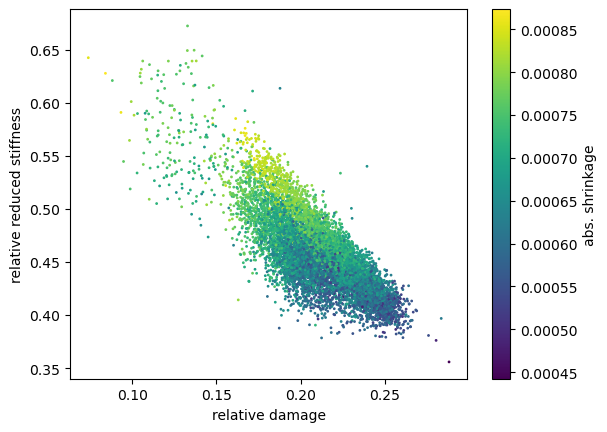

In [70]:
plt.scatter(df['damage'], stiffness_red, s=1, c=-df['shrinkage'])
plt.xlabel('relative damage')
plt.ylabel('relative reduced stiffness')
plt.colorbar(label = 'abs. shrinkage')

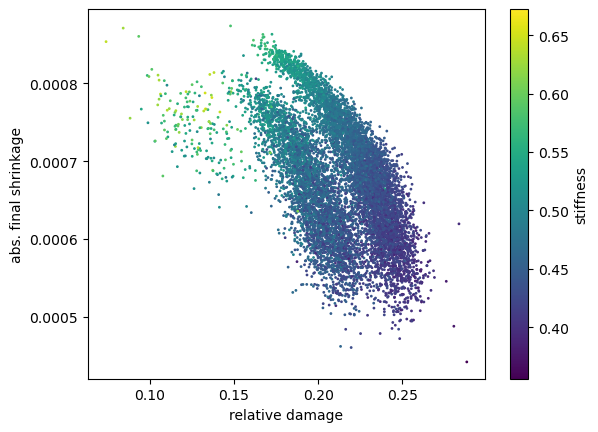

In [71]:
plt.scatter(df['damage'], -df['shrinkage'], s=1, c=stiffness_red)
plt.xlabel('relative damage')
plt.ylabel('abs. final shrinkage')
plt.colorbar(label = 'stiffness')

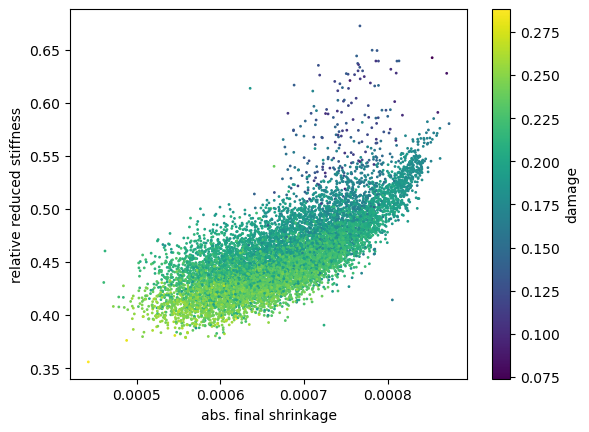

In [72]:
plt.scatter(-df['shrinkage'], stiffness_red, s=1, c=df['damage'])
plt.xlabel('abs. final shrinkage')
plt.ylabel('relative reduced stiffness')
plt.colorbar(label = 'damage')

In [3]:
from sklearn.manifold import TSNE

In [26]:
X = np.array([area for area in df['curve_area']])
#X = np.hstack([X, np.reshape(stiffness_red, (-1, 1))])

In [27]:
model = TSNE(n_components=2, random_state=0)
X_new = model.fit_transform(X)

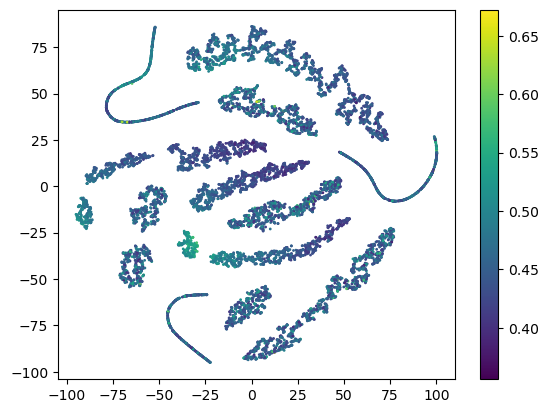

In [29]:
plt.scatter(X_new[:,0], X_new[:,1], s=1, c=stiffness_red)
plt.colorbar()

In [30]:
X = np.array([area for area in df['curve_area']])
X = np.hstack([X, np.reshape(stiffness_red, (-1, 1))])

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

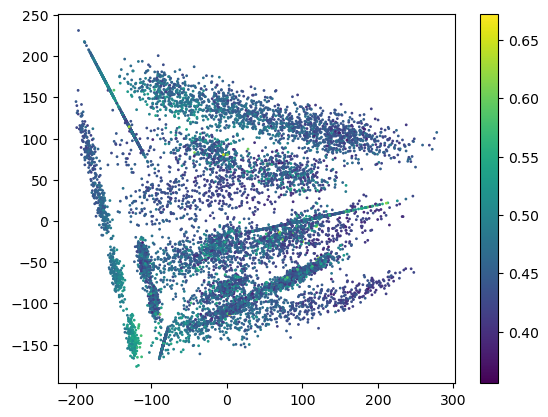

In [33]:
plt.scatter(X_new[:,0], X_new[:,1], s=1, c=stiffness_red)
plt.colorbar()

<Figure size 640x480 with 0 Axes>

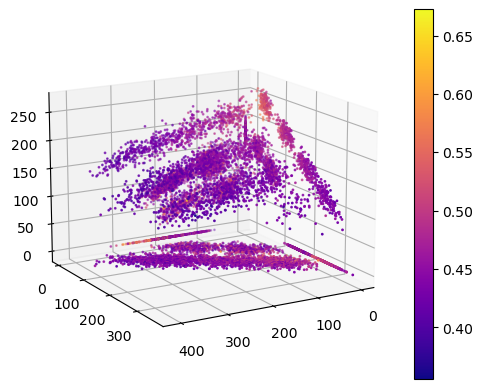

In [45]:
from mpl_toolkits.mplot3d import Axes3D
X = np.array([area for area in df['curve_area']])

plt.set_cmap('plasma')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X[:,0], X[:,1], X[:,2], c=stiffness_red, s=1)
ax.view_init(elev=15, azim=60)
fig.colorbar(scat)
plt.show()

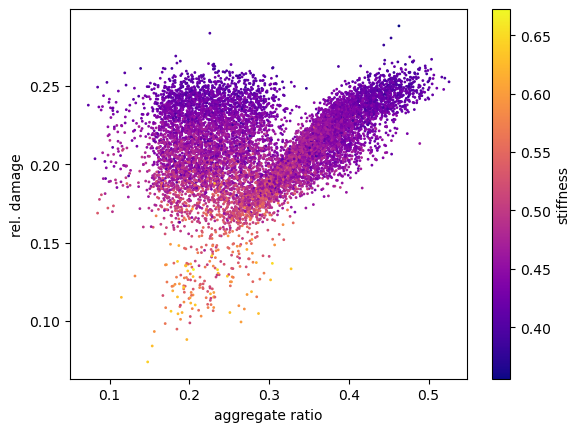

In [51]:
plt.scatter(X.sum(axis=1)/(32 * 32), df['damage'], c=stiffness_red, s=1)
plt.xlabel('aggregate ratio')
plt.ylabel('rel. damage')
plt.colorbar(label = 'stiffness')

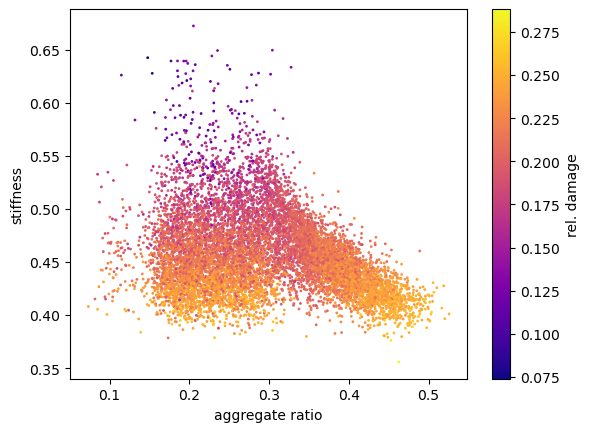

In [52]:
plt.scatter(X.sum(axis=1)/(32 * 32), stiffness_red, c=df['damage'], s=1)
plt.xlabel('aggregate ratio')
plt.ylabel('stiffness')
plt.colorbar(label = 'rel. damage')

In [69]:
roundness_16 = np.array([np.mean(roundn[16]) for roundn in df['roundness']])
roundness_8 = np.array([np.mean(roundn[8]) for roundn in df['roundness']])
roundness_4 = np.array([np.mean(roundn[4]) for roundn in df['roundness']])

c:\Users\Jorge\.conda\envs\home\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Jorge\.conda\envs\home\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


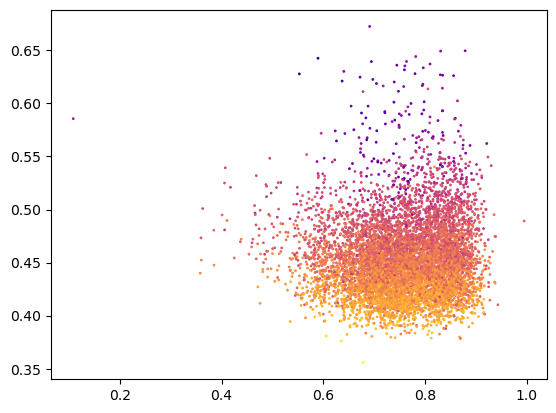

In [68]:
plt.scatter(roundness_16, stiffness_red, c=df['damage'], s=1)

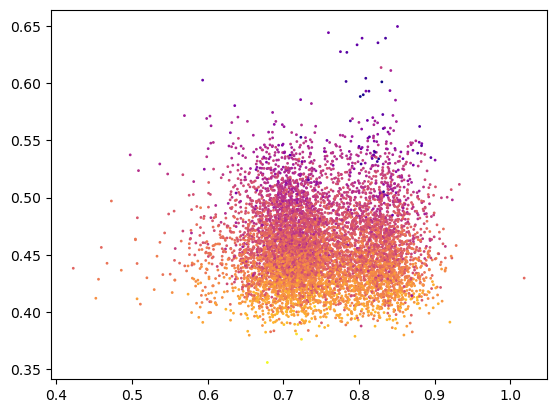

In [70]:
plt.scatter(roundness_8, stiffness_red, c=df['damage'], s=1)

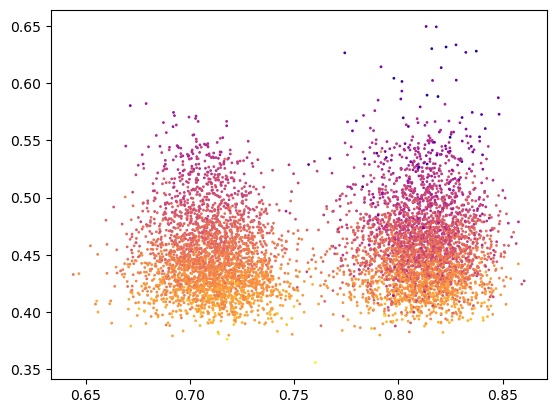

In [71]:
plt.scatter(roundness_4, stiffness_red, c=df['damage'], s=1)

In [72]:
ratios_16 = np.array([np.mean(roundn[16]) for roundn in df['ratios']])
ratios_8 = np.array([np.mean(roundn[8]) for roundn in df['ratios']])
ratios_4 = np.array([np.mean(roundn[4]) for roundn in df['ratios']])

c:\Users\Jorge\.conda\envs\home\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Jorge\.conda\envs\home\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


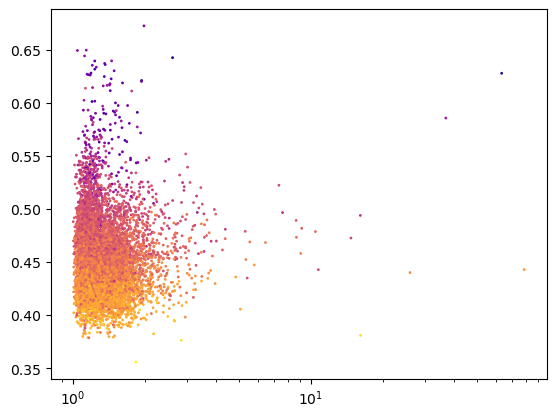

In [79]:
plt.scatter(ratios_16, stiffness_red, c=df['damage'], s=1)
plt.xscale('log')

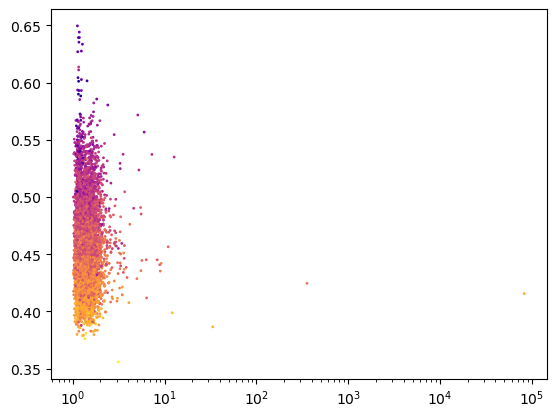

In [76]:
plt.scatter(ratios_8, stiffness_red, c=df['damage'], s=1)
plt.xscale('log')

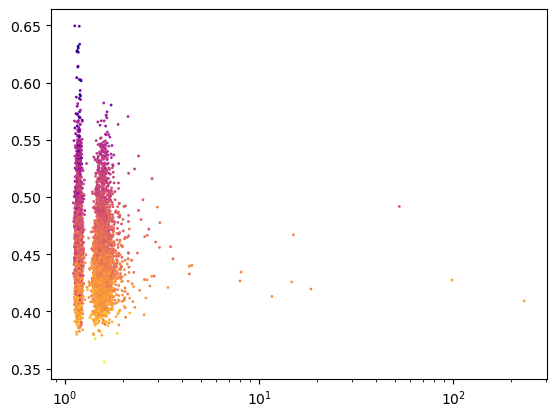

In [77]:
plt.scatter(ratios_4, stiffness_red, c=df['damage'], s=1)
plt.xscale('log')